# Analysis of Forest Cover Type Dataset using Clustering Algorithms

First, let us perform exploratory data analysis to know about attributes, null values and number of samples in our dataset.

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
data = pd.read_csv('covtype_train.csv')
data

,Elevation,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness,target
0,elevation_medium,aspect_medium,slope_low,hillshade_9am_max,hillnoon_max,0,1,low,22,0,2
1,elevation_high,aspect_medium,slope_low,hillshade_9am_max,hillnoon_max,1,1,mid,32,2,1
2,elevation_medium,aspect_low,slope_low,hillshade_9am_max,hillnoon_max,1,1,low,10,2,2
3,elevation_high,aspect_ultra,slope_medium,hillshade_9am_max,hillnoon_max,2,1,low,23,2,1
4,elevation_high,aspect_high,slope_low,hillshade_9am_max,hillnoon_max,2,1,mid,28,0,2
...,...,...,...,...,...,...,...,...,...,...,...
406703,elevation_ultra,aspect_medium,slope_low,hillshade_9am_max,hillnoon_max,1,1,mid,39,0,7
406704,elevation_medium,aspect_low,slope_medium,hillshade_9am_max,hillnoon_max,0,1,mid,28,0,2
406705,elevation_medium,aspect_medium,slope_low,hillshade_9am_max,hillnoon_max,0,1,mid,28,0,2
406706,elevation_high,aspect_high,slope_low,hillshade_9am_max,hillnoon_max,2,2,low,28,0,2


In [14]:
data.describe()

,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Soil_Type,Wilderness,target
count,406708.000000,406708.000000,406708.000000,406708.000000,406708.000000
mean,0.901701,1.202819,23.358461,1.114679,2.051472
std,1.048836,0.478138,9.483622,1.061301,1.396507
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,19.000000,0.000000,1.000000
50%,1.000000,1.000000,28.000000,1.000000,2.000000
75%,1.000000,1.000000,30.000000,2.000000,2.000000
max,6.000000,5.000000,39.000000,3.000000,7.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406708 entries, 0 to 406707
Data columns (total 11 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Elevation                           406708 non-null  object
 1   Aspect                              406708 non-null  object
 2   Slope                               406708 non-null  object
 3   Hillshade_9am                       406708 non-null  object
 4   Hillshade_Noon                      406708 non-null  object
 5   Horizontal_Distance_To_Hydrology    406708 non-null  int64 
 6   Vertical_Distance_To_Hydrology      406708 non-null  int64 
 7   Horizontal_Distance_To_Fire_Points  406708 non-null  object
 8   Soil_Type                           406708 non-null  int64 
 9   Wilderness                          406708 non-null  int64 
 10  target                              406708 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 34

Performing one hot encoding on the data to handle categorical attributes for clustering.

In [16]:
data = pd.get_dummies(data)

Now we plot a graph between number of clusters and 'Within Cluster Sum of Squares' (WCSS) and select the number clusters where change in WCSS begins to level off(elbow method).

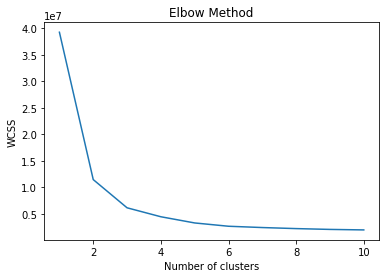

In [17]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Sampling the dataset

In [18]:
def get_sampled_dataset(data, data_points):
    sampled_data = pd.DataFrame(np.array(data.sample(data_points)))
    sampled_data.columns = data.columns
    return sampled_data

data_sampled = get_sampled_dataset(data, 5000)
data_sampled

,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Soil_Type,Wilderness,target,Elevation_elevation_high,Elevation_elevation_low,Elevation_elevation_medium,Elevation_elevation_ultra,Aspect_aspect_high,...,Slope_slope_low,Slope_slope_medium,Slope_slope_ultra,Hillshade_9am_hillshade_9am_max,Hillshade_9am_hillshade_9am_min,Hillshade_Noon_hillnoon_max,Hillshade_Noon_hillnoon_min,Horizontal_Distance_To_Fire_Points_high,Horizontal_Distance_To_Fire_Points_low,Horizontal_Distance_To_Fire_Points_mid
0,1,1,23,2,1,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1,2,1,17,0,2,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
2,0,1,11,0,1,0,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
3,0,1,22,2,1,1,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
4,0,1,28,0,2,0,0,1,0,0,...,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,1,11,0,2,1,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
4996,3,1,11,0,1,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
4997,1,1,21,0,1,1,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
4998,0,1,11,0,2,1,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0


Now using K-means clustering for unsupervised learning. Using number of clusters as 7.

In [19]:
def kmeans_cluster(data, k):
    kmeans = KMeans(n_clusters=k) # Initializing our model
    kmeans.fit(data[data.columns.drop('target')])
    clusters = kmeans.predict(data[data.columns.drop('target')])
    data["Cluster"] = clusters
    return data

clustered_data = kmeans_cluster(data_sampled, 7)
clustered_data["Cluster"].describe()

count    5000.000000
mean        2.475800
std         1.655162
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: Cluster, dtype: float64

Using PCA for reducing the dimensions of the data, and then visualizing the clusters in 2D.

In [20]:
from sklearn.decomposition import PCA
import plotly as py
import plotly.graph_objs as pyplt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

def get_PCA_dataset(n, data, cluster_labels):  # Function for reducing the dimension of the dataset
    get_pca = PCA(n_components = n)
    pca_dataset = pd.DataFrame(get_pca.fit_transform(data.drop([cluster_labels, 'target'], axis = 1)))
    return pca_dataset

def visualize_clusters(data, cluster_column, clustering_algorithm): # Function for visualizing clusters
    data_2D = get_PCA_dataset(2, data, cluster_column)
    data_2D.columns = ["PCA_2D_1", "PCA_2D_2"]
    plot_data = pd.concat([data, data_2D], axis=1, join='inner')

    cluster_0 = plot_data[plot_data[cluster_column] == 0]
    cluster_1 = plot_data[plot_data[cluster_column] == 1]
    cluster_2 = plot_data[plot_data[cluster_column] == 2]
    cluster_3 = plot_data[plot_data[cluster_column] == 3]
    cluster_4 = plot_data[plot_data[cluster_column] == 4]
    cluster_5 = plot_data[plot_data[cluster_column] == 5]
    cluster_6 = plot_data[plot_data[cluster_column] == 6]

    target_0 = pyplt.Scatter(x=cluster_0["PCA_2D_1"], y=cluster_0["PCA_2D_2"], mode="markers", name="Cluster_0", marker=dict(color='rgba(255,128,255,0.8)'), text=None)
    target_1 = pyplt.Scatter(x=cluster_1["PCA_2D_1"], y=cluster_1["PCA_2D_2"], mode="markers", name="Cluster_1", marker=dict(color='rgba(255,128,2,0.8)'), text=None)
    target_2 = pyplt.Scatter(x=cluster_2["PCA_2D_1"], y=cluster_2["PCA_2D_2"], mode="markers", name="Cluster_2", marker=dict(color='rgba(0,255,200,0.8)'), text=None)
    target_3 = pyplt.Scatter(x=cluster_3["PCA_2D_1"], y=cluster_3["PCA_2D_2"], mode="markers", name="Cluster_3", marker=dict(color='rgba(255,25,200,0.8)'), text=None)
    target_4 = pyplt.Scatter(x=cluster_4["PCA_2D_1"], y=cluster_4["PCA_2D_2"], mode="markers", name="Cluster_4", marker=dict(color='rgba(0,255,2,0.8)'), text=None)
    target_5 = pyplt.Scatter(x=cluster_5["PCA_2D_1"], y=cluster_5["PCA_2D_2"], mode="markers", name="Cluster_5", marker=dict(color='rgba(0,201,87,0.8)'), text=None)
    target_6 = pyplt.Scatter(x=cluster_6["PCA_2D_1"], y=cluster_6["PCA_2D_2"], mode="markers", name="Cluster_6", marker=dict(color='rgba(72,61,139,0.8)'), text=None)

    data_targets = [target_0, target_1, target_2, target_3, target_4, target_5, target_6]
    title = "Visualizing "+str(clustering_algorithm)+" Clusters in Two Dimensions"
    layout = dict(title = title, xaxis = dict(title='x-axis', ticklen=5, zeroline=False), yaxis = dict(title='y-axis', ticklen=5, zeroline=False))
    figure = dict(data = data_targets, layout = layout)
    iplot(figure)
    return plot_data

visualize_clusters(data_sampled, 'Cluster', 'K-Means')

,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Soil_Type,Wilderness,target,Elevation_elevation_high,Elevation_elevation_low,Elevation_elevation_medium,Elevation_elevation_ultra,Aspect_aspect_high,...,Hillshade_9am_hillshade_9am_max,Hillshade_9am_hillshade_9am_min,Hillshade_Noon_hillnoon_max,Hillshade_Noon_hillnoon_min,Horizontal_Distance_To_Fire_Points_high,Horizontal_Distance_To_Fire_Points_low,Horizontal_Distance_To_Fire_Points_mid,Cluster,PCA_2D_1,PCA_2D_2
0,1,1,23,2,1,1,0,0,0,0,...,1,0,1,0,0,0,1,0,0.637002,0.452791
1,2,1,17,0,2,0,0,1,0,0,...,1,0,1,0,0,0,1,6,6.586816,-0.342106
2,0,1,11,0,1,0,0,1,0,0,...,1,0,1,0,1,0,0,4,12.627802,-1.703921
3,0,1,22,2,1,1,0,0,0,0,...,1,0,1,0,0,1,0,0,1.664282,-0.048316
4,0,1,28,0,2,0,0,1,0,0,...,1,0,1,0,0,1,0,3,-4.343622,-1.126613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,1,11,0,2,1,0,0,0,0,...,1,0,1,0,0,1,0,4,12.548458,-0.218700
4996,3,1,11,0,1,1,0,0,0,0,...,1,0,1,0,1,0,0,4,12.522521,0.366823
4997,1,1,21,0,1,1,0,0,0,0,...,1,0,1,0,0,1,0,0,2.583024,-0.771677
4998,0,1,11,0,2,1,0,0,0,0,...,1,0,1,0,1,0,0,4,12.579014,-1.603916


Using spectral clustering for unsupervised learning and visualizing it in two dimensions.

In [21]:
from sklearn.cluster import SpectralClustering
spectral_model = SpectralClustering(n_clusters = 7, affinity = 'rbf')
data_2D = get_PCA_dataset(2, data_sampled, 'Cluster')
spectral_clusters = spectral_model.fit_predict(data_2D)
data_sampled.drop('Cluster', axis = 'columns', inplace = True)
data_sampled['Spectral_Cluster'] = spectral_clusters
plot_data = visualize_clusters(data_sampled, 'Spectral_Cluster', 'Spectral')

Using Gaussian Model for clustering and visualizing the clusters in two dimensions.

In [22]:
from sklearn.mixture import GaussianMixture
data_2D = get_PCA_dataset(2, data_sampled, 'Spectral_Cluster')
gaussian_model = GaussianMixture(n_components = 7)
gaussian_clusters = gaussian_model.fit_predict(data_2D)
data_sampled.drop('Spectral_Cluster', axis = 'columns', inplace = True)
data_sampled['Gaussian_Cluster'] = gaussian_clusters
plot_data = visualize_clusters(data_sampled, 'Gaussian_Cluster', 'Gaussian')